<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/hw2025/PSO_hw05_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Exercise 5 - Edge Direction Histogram

Create a function that returns the distribution of pixels by edge directions into n bins. You can choose any filter, but also include a threshold to only consider strong edges.

You can find the angle from the gradient values using the trigonometric function `atan2`. You will then assign a bins to cover the n different directions, which will be evenly distributed. For example, for 4 bins it will be ranges in degrees: [-45, 45), [45, 135), [135, 225), [225, 315). The first bin should always be centered around 0 degrees so for 4 bins it is [-45, 45), but for 8 bins it is [-22.5, 22.5).

For an input grayscale image the output will be an n-dimensional array with the number of edges with given edge orientation for which the gradient norm is above a given threshold.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/good_checkers.png
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg

--2023-10-24 16:58:13--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/good_checkers.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159613 (156K) [image/png]
Saving to: ‘good_checkers.png.1’

good_checkers.png.1 100%[===================>] 155.87K  --.-KB/s    in 0.02s   

2023-10-24 16:58:13 (8.62 MB/s) - ‘good_checkers.png.1’ saved [159613/159613]

--2023-10-24 16:58:13--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57259 (56

In [ ]:
def edge_direction_histogram(image, n, threshold=50):
  ...

You can test your program on these test images.

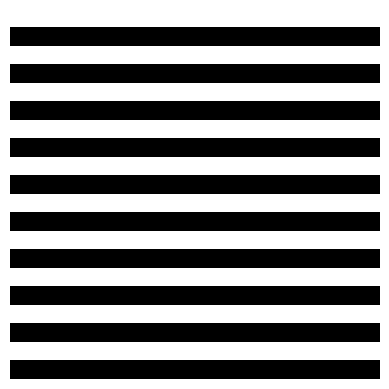

Histogram:  [1080    0 1200    0]


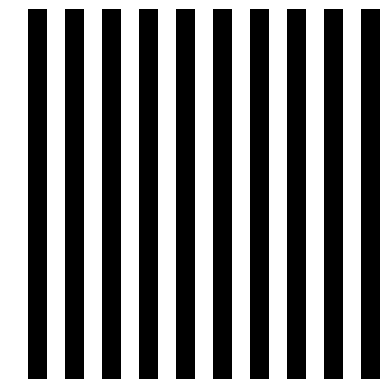

Histogram:  [   0 1080    0 1200]


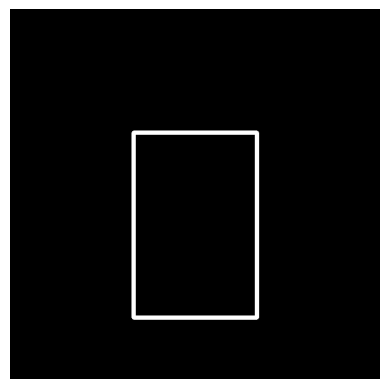

Histogram for 4 bins:  [ 800 1200  800 1200]
Histogram for 8 bins:  [ 788   12 1188   12  788   12 1188   12]
Histogram for 16 bins:  [ 780    6    8    6 1180    6    8    6  780    6    8    6 1180    6
    8    6]


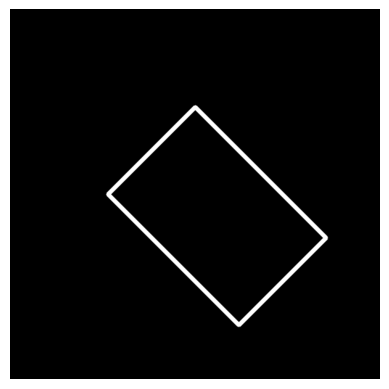

Histogram for 4 bins:  [1691 1261 1692 1125]
Histogram for 8 bins:  [  16 1245   16 1677   15 1108   15 1677]
Histogram for 16 bins:  [   4    9 1241    9    4    8 1671    8    4    7 1106    7    4    8
 1671    8]


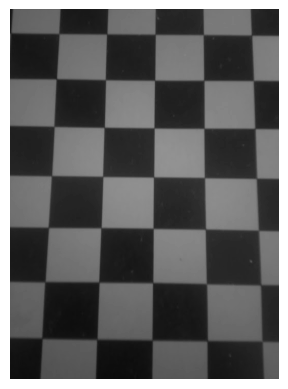

Histogram for 4 bins:  [4982 4792 5140 4668]
Histogram for 8 bins:  [4931   43 4744   55 5092   43 4614   60]
Histogram for 16 bins:  [4888   27   21   29 4692   52   24   35 5057   26   20   40 4552   53
   24   42]


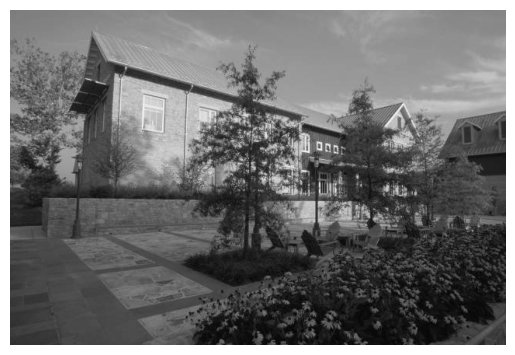

Histogram for 4 bins:  [14864 13139 16509 13610]
Histogram for 8 bins:  [8885 5447 7273 6856 9822 6125 7650 6064]
Histogram for 16 bins:  [4812 3148 2727 2754 4175 3251 3319 4700 5129 3491 2976 3195 4401 3069
 2927 4048]


In [ ]:
def rotate_img(img, angle):
  image_center = tuple(np.array(img.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

a = np.array([[1,1,1,0,0,0]]).astype(float)
img = np.tile(a.T, (10, 60))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
print('Histogram: ', edge_direction_histogram(img, 4, 0.5))

a = np.array([[1,1,1,0,0,0]]).astype(float)
img = np.tile(a, (60, 10))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
print('Histogram: ', edge_direction_histogram(img, 4, 0.5))


img = np.zeros([600, 600])
img = cv2.rectangle(img, (200, 200), (400, 500), 1.0, 5)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
print('Histogram for 4 bins: ', edge_direction_histogram(img, 4, 0.5))
print('Histogram for 8 bins: ', edge_direction_histogram(img, 8, 0.5))
print('Histogram for 16 bins: ', edge_direction_histogram(img, 16, 0.5))

img = rotate_img(img, 45)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
print('Histogram for 4 bins: ', edge_direction_histogram(img, 4, 0.5))
print('Histogram for 8 bins: ', edge_direction_histogram(img, 8, 0.5))
print('Histogram for 16 bins: ', edge_direction_histogram(img, 16, 0.5))


img = cv2.cvtColor(cv2.imread('good_checkers.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()
print('Histogram for 4 bins: ', edge_direction_histogram(img, 4, 100))
print('Histogram for 8 bins: ', edge_direction_histogram(img, 8, 100))
print('Histogram for 16 bins: ', edge_direction_histogram(img, 16, 100))


img = cv2.cvtColor(cv2.imread('building.jpg'), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()
print('Histogram for 4 bins: ', edge_direction_histogram(img, 4, 100))
print('Histogram for 8 bins: ', edge_direction_histogram(img, 8, 100))
print('Histogram for 16 bins: ', edge_direction_histogram(img, 16, 100))